# P2 - Investigate a Dataset (Titanic)
    by Pedro Burgos

## Women and children (specially if they're rich) first: The Titanic survivors

More than 1,500 people died when the [Titanic sank](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic) in her maiden voyage in 1912. That was roughly 67% of the 2,224 passengers and crew aboard the ship, at the time the largest in the world. There is [no precise information](http://www.statisticalconsultants.co.nz/blog/titanic-survival-data.html) on each and every passenger onboard – not even the exact number of the dead. But Philip Hind's [Encyclopedia Titanica](http://www.encyclopedia-titanica.org/) has amassed over time a large body of data on the passengers and crew, from fare price to age and cabin number of 891 people aboard the ship. From that dataset we can, see the breakdown of cabin classes by sex:

![img](http://i.cubeupload.com/tPcFdO.png)

We can see that a lot more men were on the third class, which in the end limited the chances of survival. From the time the Titanic hit the iceberg and its total sinking, two hours and forty minutes has passed. In that time, Captain Edward Smith [famously ordered](https://books.google.co.th/books?id=lBQWD4fhCN4C&pg=PA21&lpg=PA21&dq=titanic+%22women+and+children+in+and+lower+away%22&source=bl&ots=pul4USlt7X&sig=K5NqjEBS7mYWPhoTyYh5V8ZucIY&hl=en&sa=X&ei=xaqrVJ-wF86cugTYxIHgCQ&redir_esc=y#v=onepage&q=titanic%20%22women%20and%20children%20in%20and%20lower%20away%22&f=false):  "put the women and children in and lower away", which his officers understood as a command to save women and children *only*. That may explain the discrepancy in terms of people that survived the tragedy:

![img](http://i.cubeupload.com/kjHEdq.png)

A closer inspection shows that wealth was also a factor, as passengers in the first class had a a better chance of getting in the boats – 63% of them survived, versus a little less than 25% in the third class. But sex ultimately prevailed: women in the third class had a higher chance of survival than men in the first.

![img](http://i.cubeupload.com/to1lF8.png)

The data also shows that people were willing to pay small fortunes to travel from England to New York. The typical (median) fare for the third class was 8.05 pounds, or 853 pounds in today's money. A first class ticket costed on average 60.28 pounds, or 6,390 pounds corrected by inflation. Alas, there was little correlation between the ones that paid the most expensive tickets and those who survived. 

![img](http://i.cubeupload.com/tfy7xm.png)

The interesting thing is that the idea that women and children should be saved first, verifiable in Titanic's data and prevalent in pop culture, turns out to be the exception, not the rule, when it comes to ships sinking. According to a 2012 [Swedish study](http://m.pnas.org/content/109/33/13220.full.pdf) that looked at 18 major maritime disasters, captains and crew survive at a significantly higher rate than passengers, particularly women and children. "Our findings show that human behavior in life-and-death situations is best captured by the expression “every man for himself,” concluded the researchers. 



----

## Code

In [26]:
## reading the csv file:
import pandas as pd
import numpy as np
%matplotlib inline

titanic_master_data = pd.read_csv('titanic_data.csv')

## Checking to see if everything's ok:
titanic_master_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


## First: finding averages and total counts

Idea: get a better aggregate sense of:
* The distribution of passengers in terms of class and sex, the average price pair for each class, and if there was any meaningful difference between how much survivors and non-survivors paid.

[<matplotlib.text.Text at 0x10d7c5290>, <matplotlib.text.Text at 0x10d8e8050>]

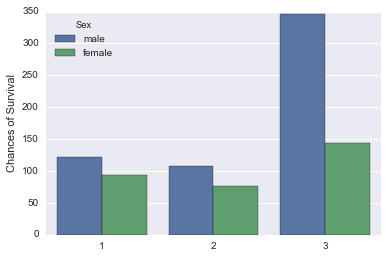

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate

titanic_class_sex_data = sns.countplot(x="Pclass", hue="Sex", data=titanic_master_data.sort_values(by="Pclass"))
titanic_class_sex_data.set(xlabel='', ylabel='Chances of Survival')

## Second step: Testing who had the most chances of survival.

**Idea: test different correlations**
- Survived x Age
- Survived x Sex
- Survived x Siblings or spouses
- Survived x Parents or childen
- Survived x Passenger Class

In [28]:
## At first I've created a function that takes any one row in the csv data and compare it to a fixed row to find a correlation. Returns Series.
def find_survivability(column):
    correlation = {}
    if column == "Sex":
        clean_data = titanic_master_data.replace(to_replace='male', value=1).replace(to_replace='female', value=0)
        correlation = clean_data[column].corr(titanic_master_data['Survived'])
        return pd.Series(correlation, index=[column])
    correlation = titanic_master_data[column].corr(titanic_master_data['Survived'])
    return pd.Series(correlation, index=[column])

## Now, applying the function to different parameters/columns: 
age_survival_corr = find_survivability('Age')
sex_survival_corr = find_survivability('Sex')
SibSp_survival_corr = find_survivability('SibSp')
Parch_survival_corr = find_survivability('Parch')
class_survival_corr = find_survivability('Pclass')

## Creating a DataFrame to compare all of them in a better way:
correlations_list = [class_survival_corr, Parch_survival_corr, SibSp_survival_corr, sex_survival_corr, age_survival_corr]
correlations = pd.DataFrame(pd.concat(correlations_list, axis=0), columns=['correlations'])

## Visualizing different correlations:
correlations

,correlations
Pclass,-0.338481
Parch,0.081629
SibSp,-0.035322
Sex,-0.543351
Age,-0.077221


**Good, but not enough:**

Predictable enough, women and people in higher classes (as in: lower numbers) had better chances of survival. There are two problems with an output like that: not everyone understands "correlation", and the age factor was less important than I first predicted. So I need to create a better way to visualize all this data, and also to create a "child" category, and see if the idea of "women and children first" holds up. 


In [29]:
## Creating the "children" category.
## First, a function to diferentiate male and female adults and children:

def my_test(row):
    if row['Sex'] == 'male' and row['Age'] > 16:
        return 'Man'
    elif row['Sex'] == 'female' and row['Age'] > 16:
        return 'Woman'
    else:
        return 'Children'
    
## Now, I create a new row with the age grouped
titanic_master_data['Who'] = titanic_master_data.apply(my_test, axis=1)

## Testing
titanic_master_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Who
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Woman
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Woman
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Woman
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Man
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Children
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,Man
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,Children
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,Woman
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,Children


----

## Third: Other interesting figures

In [57]:
## Adding a new row with fare corrected by inflation:
def inflation_1912(price):
    return price * 106

titanic_master_data['Fare_corrected'] = titanic_master_data['Fare'].apply(inflation_1912)

## Grouping fare and survival characteristics by cabin class:
titanic_master_data.groupby('Pclass').describe()

Age        Fare  Fare_corrected       Parch  PassengerId  \
Pclass                                                                          
1      count  186.000000  216.000000      216.000000  216.000000   216.000000   
       mean    38.233441   84.154687     8920.396875    0.356481   461.597222   
       std     14.802856   78.380373     8308.319501    0.693997   246.737616   
       min      0.920000    0.000000        0.000000    0.000000     2.000000   
       25%     27.000000   30.923950     3277.938700    0.000000   270.750000   
       50%     37.000000   60.287500     6390.475000    0.000000   472.000000   
       75%     49.000000   93.500000     9911.000000    0.000000   670.500000   
       max     80.000000  512.329200    54306.895200    4.000000   890.000000   
2      count  173.000000  184.000000      184.000000  184.000000   184.000000   
       mean    29.877630   20.662183     2190.191414    0.380435   445.956522   
       std     14.001077   13.417399     1422.244268    0.690963   250.852161   
       min      0.670000    0.000000        0.000000    0.000000    10.000000   
       25%     23.000000   13.000000     1378.000000    0.000000   234.500000   
       50%     29.000000   14.250000     1510.500000    0.000000   435.500000   
       75%     36.000000   26.000000     2756.000000    1.000000   668.000000   
       max     70.000000   73.500000     7791.000000    3.000000   887.000000   
3      count  355.000000  491.000000      491.000000  491.000000   491.000000   
       mean    25.140620   13.675550     1449.608311    0.393075   439.154786   
       std     12.495398   11.778142     1248.483021    0.888861   264.441453   
       min      0.420000    0.000000        0.000000    0.000000     1.000000   
       25%     18.000000    7.750000      821.500000    0.000000   200.000000   
       50%     24.000000    8.050000      853.300000    0.000000   432.000000   
       75%     32.000000   15.500000     1643.000000    0.000000   666.500000   
       max     74.000000   69.550000     7372.300000    6.000000   891.000000   

                   SibSp    Survived  
Pclass                                
1      count  216.000000  216.000000  
       mean     0.416667    0.629630  
       std      0.611898    0.484026  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    1.000000  
       75%      1.000000    1.000000  
       max      3.000000    1.000000  
2      count  184.000000  184.000000  
       mean     0.402174    0.472826  
       std      0.601633    0.500623  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      1.000000    1.000000  
       max      3.000000    1.000000  
3      count  491.000000  491.000000  
       mean     0.615071    0.242363  
       std      1.374883    0.428949  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      1.000000    0.000000  
       max      8.000000    1.000000

-----

## Fourth: some Visualizations

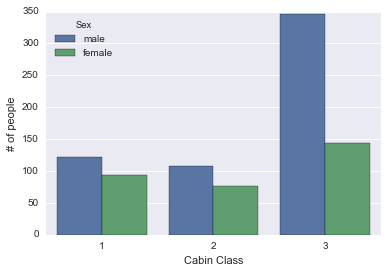

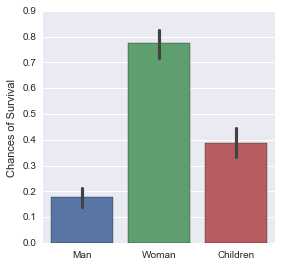

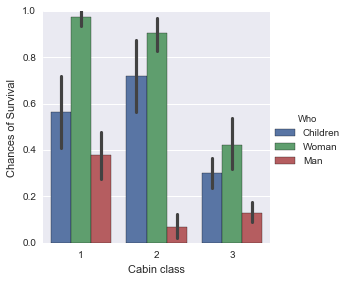

In [30]:
## Now, visualizing the percentages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate

## Number of people in each class:
Class_distribution = sns.countplot(x="Pclass", hue="Sex", data=titanic_master_data.sort_values(by="Pclass"))
Class_distribution.set(xlabel='Cabin Class', ylabel='# of people')

## Chances of survival for each group of people
survival_chances = sns.factorplot(x="Who", y="Survived", data=titanic_master_data, kind="bar")
survival_chances.set(xlabel='', ylabel='Chances of Survival')

## Chances of survival for each group of people
survival_by_class = sns.factorplot(x="Pclass", y="Survived", data=titanic_master_data.sort_values(by="Pclass"), kind="bar", hue="Who")
survival_by_class.set(xlabel='Cabin class', ylabel='Chances of Survival')

survival_chances
Class_distribution
survival_by_class

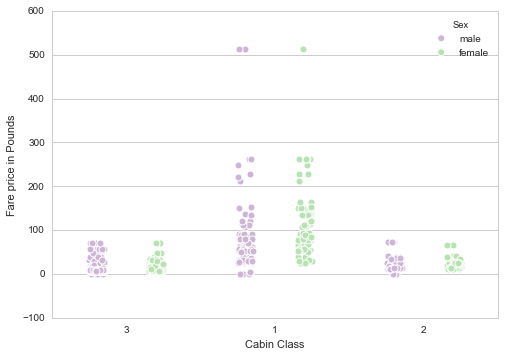

In [50]:
## Average fare for each class:
sns.set(style="whitegrid", color_codes=True)
average_fare = sns.stripplot(x="Pclass", y='Fare', hue="Sex", data=titanic_master_data, palette="PRGn", jitter=True)
average_fare.set(xlabel="Cabin Class", ylabel="Fare price in Pounds")

average_fare

----

## Notes and references:

- Titanic [Data](https://www.kaggle.com/c/titanic/data)
- Gender, social norms and maritime distasters - [Uppsala University](http://m.pnas.org/content/109/33/13220.full.pdf)
- “Women and children first” is a maritime disaster myth—it’s really “every man for himself” - [Quartz](http://qz.com/321827/women-and-children-first-is-a-maritime-disaster-myth-its-really-every-man-for-himself/)
- Documentation for [Replace function](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.replace.html)
- Documentation for [.corr function](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.Series.corr.html).
- Using [Counter](https://docs.python.org/2/library/collections.html) to count elements.
- Seaborn [documentation](https://stanford.edu/~mwaskom/software/seaborn/tutorial.html)
- Adjusting historic price with the [Historical UK Inflation calculator](http://inflation.stephenmorley.org/).

### csv details: 

VARIABLE DESCRIPTIONS:
* survival        Survival
                (0 = No; 1 = Yes)
* pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
* name            Name
* sex             Sex
* age             Age
* sibsp           Number of Siblings/Spouses Aboard
* parch           Number of Parents/Children Aboard
* ticket          Ticket Number
* fare            Passenger Fare
* cabin           Cabin
* embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

**SPECIAL NOTES**:
Pclass is a proxy for socio-economic status (SES)
* 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
* If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the definitions used for sibsp and parch.

* Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic

* Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)

* Parent:   Mother or Father of Passenger Aboard Titanic
* Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.